In [2]:
import sys
sys.path.append('/home/mila/l/leo.gagnon/latent_control')

In [3]:
%load_ext autoreload
%autoreload 2
from tasks.dsm_diffusion import DSMDiffusion
import torch
import matplotlib.pyplot as plt
from data.diffusion import LatentDiffusionDataset
from data.hmm import MetaHMM
from torch2jax import j2t, t2j
import jax.numpy as jnp
import jax
from jax.scipy.special import rel_entr
from einops import repeat, rearrange
from models.encoder import KnownEncoder
from models.decoder import TransformerDecoder
from tqdm import tqdm
from tasks.metalearn import MetaLearningTask
import torch.nn as nn
import pandas as pd
import seaborn as sns
import einx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
task = MetaLearningTask.load_from_checkpoint(
    "/network/scratch/l/leo.gagnon/latent_control_log/checkpoints/qv5uut9x/last.ckpt", strict=False
)
task.setup()

In [8]:
pp_dict = task.evaluate_pp(samples=20, n_steps=200)

20it [00:06,  2.91it/s]


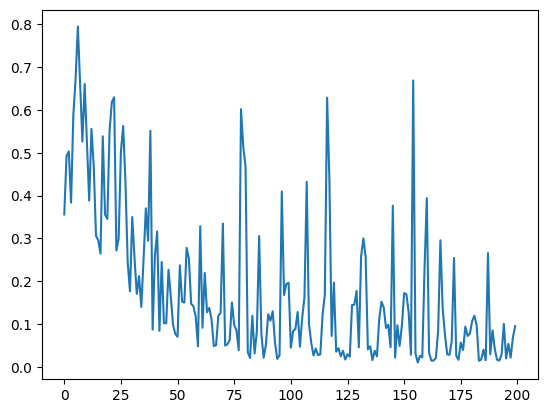

In [9]:
plt.plot(pp_dict['BackwardKL'].mean(0))